# Project 1

# # Predict Airline Fare Ticket using Machine Learning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Collection

In [2]:
#Read Data
train_data = pd.read_excel(r"LOCATION OF THE CSV FILE")

In [3]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
train_data.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


# Data Cleaning

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
train_data[train_data["Total_Stops"].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [8]:
train_data.dropna(inplace=True)

In [9]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [10]:
train_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [11]:
train_data.info(memory_usage=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


# Data Preprocessing and Extract derived Features

In [12]:
data = train_data.copy()

In [13]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [14]:
#Date_of_Journey,Dep_Time  and Arrival_Time should be time stamp. To change data type object to time I will write a function

def change_into_Datetime(col):
    data[col]=pd.to_datetime(data[col])


In [15]:
import warnings
from warnings import filterwarnings
filterwarnings("ignore")

In [16]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [17]:
for features in ['Date_of_Journey','Dep_Time', 'Arrival_Time']:
    change_into_Datetime(features)


In [18]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [19]:
data["Journey_day"]=data["Date_of_Journey"].dt.day
data["Journey_day"]

0        24
1         5
2         6
3         5
4         3
         ..
10678     4
10679    27
10680    27
10681     3
10682     5
Name: Journey_day, Length: 10682, dtype: int64

In [20]:
data["Journey_month"]=data["Date_of_Journey"].dt.month

In [21]:
data["Journey_year"] = data["Date_of_Journey"].dt.year

In [22]:
data.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-06-09 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019


In [23]:
#extract derive from 	Dep_Time	Arrival_Time
def extract_hour_min(df,col):
    df[col+"_hour"] = df[col].dt.hour
    df[col+"_minute"]=df[col].dt.minute
    return df.head()

In [24]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_day', 'Journey_month',
       'Journey_year'],
      dtype='object')

In [25]:
extract_hour_min(data,'Dep_Time')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-06-09 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-06-09 05:50:00,2023-06-09 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019,5,50
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2023-06-09 09:25:00,2023-06-10 04:25:00,19h,2 stops,No info,13882,6,9,2019,9,25
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2023-06-09 18:05:00,2023-06-09 23:30:00,5h 25m,1 stop,No info,6218,5,12,2019,18,5
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2023-06-09 16:50:00,2023-06-09 21:35:00,4h 45m,1 stop,No info,13302,3,1,2019,16,50


In [26]:
extract_hour_min(data,'Arrival_Time')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-06-09 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-06-09 05:50:00,2023-06-09 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2023-06-09 09:25:00,2023-06-10 04:25:00,19h,2 stops,No info,13882,6,9,2019,9,25,4,25
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2023-06-09 18:05:00,2023-06-09 23:30:00,5h 25m,1 stop,No info,6218,5,12,2019,18,5,23,30
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2023-06-09 16:50:00,2023-06-09 21:35:00,4h 45m,1 stop,No info,13302,3,1,2019,16,50,21,35


In [27]:
#now I can drop  'Dep_Time', 'Arrival_Time' I don't need this two column any more
col_to_drop = ['Dep_Time','Arrival_Time']

data.drop(col_to_drop, axis =1 ,inplace=True)

In [28]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute'],
      dtype='object')

In [29]:
data.shape

(10682, 16)

# Data Analysis

In [30]:
# when of the most flight takeoff

def flight_dep_time(x):
    if (x>4) and (x<=8):
        return "Early Morning"
    
    elif (x>8) and (x<=12):
        return "Morning"
    
    elif (x>12) and (x<=16):
        return "Noon"
    
    elif (x>16) and (x<=20):
        return "Evening"
    
    elif(x>20) and (x<=24):
        return "Night"
        
    else:
        return "Late Night"

<AxesSubplot:>

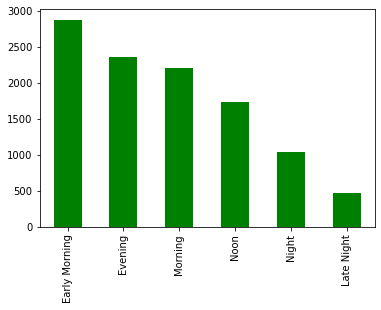

In [31]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().plot(kind ='bar',color ='g')

In [32]:
pip install cufflinks

Note: you may need to restart the kernel to use updated packages.


In [33]:
import plotly
import cufflinks as cf 
from cufflinks.offline import go_offline
from plotly.offline import plot,iplot,init_notebook_mode, download_plotlyjs
init_notebook_mode(connected=True)
cf.go_offline()


In [34]:
data["Dep_Time_hour"].apply(flight_dep_time).value_counts().iplot(kind="bar")

In [35]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,2019,9,25,4,25


In [36]:
#preprocess duration
def preprocess_duration(x):
    if 'h' not in x:
        x='0h' + " " + x
    elif 'm' not in x:
        x=x + " " + '0m'
        
    return x

In [37]:
data['Duration'] = data['Duration'].apply(preprocess_duration)

In [38]:
data['Duration']

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [39]:
data['Duration_hours'] = data['Duration'].apply(lambda x : int(x.split(" ")[0][0:-1]))

In [40]:
data['Duration_min'] = data['Duration'].apply(lambda x : int(x.split(" ")[1][0:-1]))

In [41]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_min'],
      dtype='object')

In [42]:
data["Duration_total_mins"] = data['Duration'].str.replace("h",'*60').str.replace(" ",'+').str.replace("m",'*1').apply(eval)

<AxesSubplot:xlabel='Duration_total_mins', ylabel='Price'>

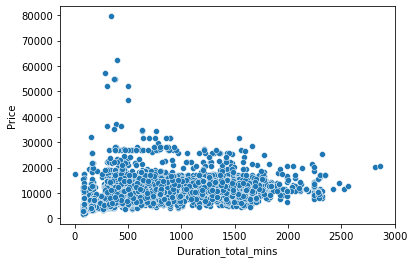

In [43]:
#Analyse duration impact on price or not
sns.scatterplot(x= 'Duration_total_mins',y='Price',data = data)

<AxesSubplot:xlabel='Duration_total_mins', ylabel='Price'>

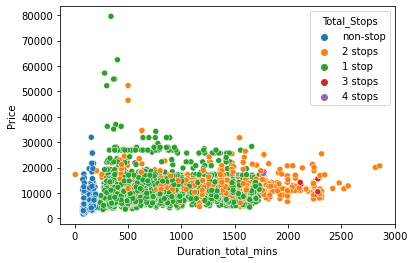

In [44]:
sns.scatterplot(x= 'Duration_total_mins',y='Price',hue="Total_Stops",data = data)

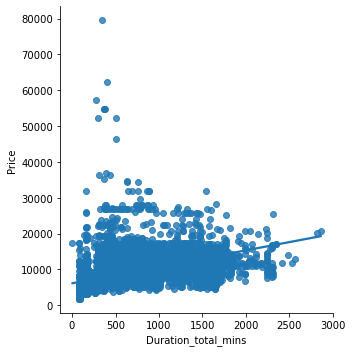

In [45]:
sns.lmplot(x= 'Duration_total_mins',y='Price',data = data)

# Bi variant analysis

In [46]:
#on which way jetairways  is extremely used
# Airlines vs price analysis
data.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_min,Duration_total_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50,170


In [47]:
data[data["Airline"]=='Jet Airways'].groupby('Route').size()

Route
BLR → BDQ → DEL            8
BLR → BOM → DEL          385
BLR → BOM → JDH → DEL      3
BLR → DEL                382
BLR → MAA → DEL           10
BOM → BDQ → DEL → HYD      2
BOM → DED → DEL → HYD      1
BOM → DEL → HYD            5
BOM → HYD                207
BOM → IDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → VNS → DEL → HYD      1
CCU → BOM → BLR          930
CCU → BOM → PNQ → BLR      4
CCU → DEL → BLR          300
CCU → GAU → BLR           22
DEL → AMD → BOM → COK    141
DEL → ATQ → BOM → COK     38
DEL → BDQ → BOM → COK     28
DEL → BHO → BOM → COK     29
DEL → BOM → COK          875
DEL → CCU → BOM → COK      1
DEL → COK                 34
DEL → DED → BOM → COK      2
DEL → IDR → BOM → COK     86
DEL → IXC → BOM → COK     13
DEL → JAI → BOM → COK    207
DEL → JDH → BOM → COK     23
DEL → LKO → BOM → COK     25
DEL → MAA → BOM → COK     16
DEL → NAG → BOM → COK     61
DEL → UDR → BOM → COK      7
dtype: int64

In [48]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_min', 'Duration_total_mins'],
      dtype='object')

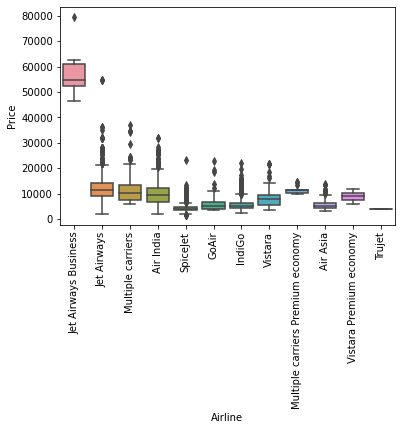

In [49]:
sns.boxplot(x='Airline', y='Price', data = data.sort_values("Price", ascending = False))
plt.xticks(rotation='vertical')
plt.show()

# Feature Encoding

In [50]:
#Applying one hot data is a feature encoding technique means converting categorical features into numerical features
[col for col in data.columns if data[col].dtype=="object"]


['Airline',
 'Source',
 'Destination',
 'Route',
 'Duration',
 'Total_Stops',
 'Additional_Info']

In [51]:
[col for col in data.columns if data[col].dtype!="object"]


['Date_of_Journey',
 'Price',
 'Journey_day',
 'Journey_month',
 'Journey_year',
 'Dep_Time_hour',
 'Dep_Time_minute',
 'Arrival_Time_hour',
 'Arrival_Time_minute',
 'Duration_hours',
 'Duration_min',
 'Duration_total_mins']

In [52]:
data["Source"].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [53]:
for sub_category in data["Source"].unique():
    data["Source_"+sub_category]=data["Source"].apply(lambda x : 1 if x==sub_category else 0)

In [54]:
data.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_min,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0


In [55]:
data["Airline"].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [56]:
airlines = data.groupby(["Airline"])['Price'].mean().sort_values().index

In [57]:
airlines

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [58]:
dict_airlines = {key : index for index, key in enumerate(airlines,0)}

In [59]:
dict_airlines

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [60]:
data['Airline'] = data['Airline'].map(dict_airlines)

In [61]:
data['Airline']

0         3
1         7
2        10
3         3
4         3
         ..
10678     2
10679     7
10680    10
10681     5
10682     7
Name: Airline, Length: 10682, dtype: int64

In [62]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_min,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,7,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,...,13,15,7,25,445,0,1,0,0,0
2,10,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,...,4,25,19,0,1140,0,0,1,0,0


In [63]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [64]:
data['Destination'].replace('New Delhi','Delhi', inplace = True)

In [65]:
data['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [66]:
dest = data.groupby(['Destination'])['Price'].mean().sort_values().index

In [67]:
dest

Index(['Kolkata', 'Hyderabad', 'Delhi', 'Banglore', 'Cochin'], dtype='object', name='Destination')

In [68]:
dict_dest = {key : index for index,key in enumerate(dest,0)}

In [69]:
dict_dest

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [70]:
data['Destination'] = data['Destination'].map(dict_dest)

In [71]:
data['Destination']

0        2
1        3
2        4
3        3
4        2
        ..
10678    3
10679    3
10680    2
10681    2
10682    4
Name: Destination, Length: 10682, dtype: int64

In [72]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_min,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,7,2019-01-05,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,...,13,15,7,25,445,0,1,0,0,0


In [73]:
#Manual endoing on data
# Remove unnecessary features
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [74]:
stop = {'non-stop' : 0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [75]:
data['Total_Stops'] = data['Total_Stops'].map(stop)

In [76]:
data['Total_Stops']

0        0
1        2
2        2
3        1
4        1
        ..
10678    0
10679    0
10680    0
10681    0
10682    2
Name: Total_Stops, Length: 10682, dtype: int64

In [77]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_min,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,0,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,7,2019-01-05,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662,5,...,13,15,7,25,445,0,1,0,0,0
2,10,2019-09-06,Delhi,4,DEL → LKO → BOM → COK,19h 0m,2,No info,13882,6,...,4,25,19,0,1140,0,0,1,0,0
3,3,2019-12-05,Kolkata,3,CCU → NAG → BLR,5h 25m,1,No info,6218,5,...,23,30,5,25,325,0,1,0,0,0
4,3,2019-01-03,Banglore,2,BLR → NAG → DEL,4h 45m,1,No info,13302,3,...,21,35,4,45,285,1,0,0,0,0


In [78]:
data['Additional_Info'].value_counts()/len(data)*100

No info                         78.112713
In-flight meal not included     18.554578
No check-in baggage included     2.995694
1 Long layover                   0.177869
Change airports                  0.065531
Business class                   0.037446
No Info                          0.028085
1 Short layover                  0.009362
Red-eye flight                   0.009362
2 Long layover                   0.009362
Name: Additional_Info, dtype: float64

In [79]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_min', 'Duration_total_mins', 'Source_Banglore',
       'Source_Kolkata', 'Source_Delhi', 'Source_Chennai', 'Source_Mumbai'],
      dtype='object')

In [80]:
data.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_min,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,0,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0


In [81]:
data.drop(columns=['Date_of_Journey','Source','Additional_Info','Duration_total_mins','Journey_year'], axis =1, inplace = True)

In [82]:
data.columns

Index(['Airline', 'Destination', 'Route', 'Duration', 'Total_Stops', 'Price',
       'Journey_day', 'Journey_month', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_min', 'Source_Banglore', 'Source_Kolkata', 'Source_Delhi',
       'Source_Chennai', 'Source_Mumbai'],
      dtype='object')

In [83]:
data.head(1)

,Airline,Destination,Route,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_min,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,BLR → DEL,2h 50m,0,3897,24,3,22,20,1,10,2,50,1,0,0,0,0


In [84]:
data.drop(columns=['Route'],axis =1,inplace = True)

In [85]:
data.columns

Index(['Airline', 'Destination', 'Duration', 'Total_Stops', 'Price',
       'Journey_day', 'Journey_month', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_min', 'Source_Banglore', 'Source_Kolkata', 'Source_Delhi',
       'Source_Chennai', 'Source_Mumbai'],
      dtype='object')

In [86]:
data.drop(columns=['Duration'], axis =1,inplace = True)

In [87]:
data.columns

Index(['Airline', 'Destination', 'Total_Stops', 'Price', 'Journey_day',
       'Journey_month', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_min', 'Source_Banglore', 'Source_Kolkata', 'Source_Delhi',
       'Source_Chennai', 'Source_Mumbai'],
      dtype='object')

In [88]:
data.head(3)

,Airline,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_min,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,0,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,3,2,7662,5,1,5,50,13,15,7,25,0,1,0,0,0
2,10,4,2,13882,6,9,9,25,4,25,19,0,0,0,1,0,0


In [89]:
#Now Outlier detection
#How to deal with outliers

def plot(df, col):
    fig,(ax1,ax2,ax3) = plt.subplots(3,1)
    sns.distplot(df[col],ax = ax1)
    sns.boxplot(df[col],ax = ax2)
    sns.distplot(df[col],ax = ax3, kde = False)

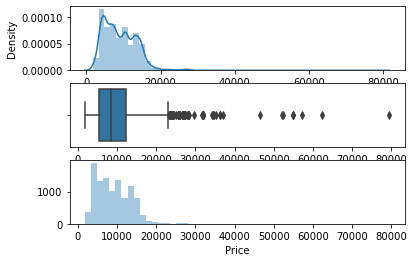

In [90]:
plot(data,'Price')

In [91]:
q1 = data['Price'].quantile(0.25)
q3 = data['Price'].quantile(0.75)

iqr = q3 - q1

maximum = q3 + 1.5*iqr
minimum = q1 - 1.5*iqr

In [92]:
maximum

23017.0

In [93]:
minimum

-5367.0

In [94]:
print([price for price in data['Price'] if price > maximum or price < minimum])

[27430, 36983, 26890, 26890, 25139, 27210, 52229, 26743, 26890, 25735, 27992, 26890, 26890, 23583, 26890, 23533, 24115, 25735, 54826, 31783, 27992, 26890, 26890, 25430, 36235, 27210, 26890, 25735, 54826, 26890, 35185, 79512, 28097, 27992, 26890, 25735, 26092, 31825, 25913, 25735, 27992, 31825, 23267, 62427, 54826, 31825, 25430, 26890, 36235, 23843, 26890, 25735, 28322, 25735, 25735, 31825, 26890, 27992, 34273, 46490, 29528, 26890, 26890, 26890, 34503, 26890, 27992, 26890, 26890, 23170, 24528, 26890, 27992, 25735, 34608, 25703, 26890, 23528, 31825, 27282, 25735, 27992, 52285, 24017, 31945, 26890, 24318, 23677, 27992, 24210, 57209, 26890, 31825, 26480]


In [95]:
len([price for price in data['Price'] if price > maximum or price < minimum])

94

In [96]:
data['Price'] = np.where(data['Price']>=35000,data['Price'].median(),data['Price'])

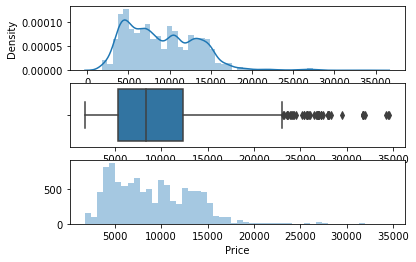

In [97]:
plot(data,'Price')

In [109]:
X = data.drop(['Price'],axis =1)

In [110]:
#Perform feature selection
#I will use mutual information approach
#for this i need my independent and dependent data

y = data['Price']

In [111]:
y

0         3897.0
1         7662.0
2        13882.0
3         6218.0
4        13302.0
          ...   
10678     4107.0
10679     4145.0
10680     7229.0
10681    12648.0
10682    11753.0
Name: Price, Length: 10682, dtype: float64

In [112]:
from sklearn.feature_selection import mutual_info_regression

In [113]:
imp = mutual_info_regression(X,y)
imp

array([0.97035445, 1.00724455, 0.79388302, 0.1912171 , 0.24573397,
       0.34053089, 0.25854241, 0.40728598, 0.34480138, 0.46466314,
       0.3405218 , 0.39028419, 0.45593697, 0.52272817, 0.13781132,
       0.19959741])

In [115]:
imp_df = pd.DataFrame(imp, index=X.columns)

In [116]:
imp_df

,0
Airline,0.970354
Destination,1.007245
Total_Stops,0.793883
Journey_day,0.191217
Journey_month,0.245734
Dep_Time_hour,0.340531
Dep_Time_minute,0.258542
Arrival_Time_hour,0.407286
Arrival_Time_minute,0.344801
Duration_hours,0.464663


In [117]:
imp_df.columns = ['Importance']

In [118]:
imp_df.sort_values(by='Importance',ascending = False)

,Importance
Destination,1.007245
Airline,0.970354
Total_Stops,0.793883
Source_Delhi,0.522728
Duration_hours,0.464663
Source_Kolkata,0.455937
Arrival_Time_hour,0.407286
Source_Banglore,0.390284
Arrival_Time_minute,0.344801
Dep_Time_hour,0.340531


# Model Building

In [119]:
#Let's Build ML model
#save model
from sklearn.model_selection import train_test_split

In [120]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.25, random_state=42)

In [121]:
from sklearn.ensemble import RandomForestRegressor

In [122]:
ml_model = RandomForestRegressor()

In [123]:
ml_model.fit(X_train,y_train)

RandomForestRegressor()

In [124]:
y_pred = ml_model.predict(X_test)

In [125]:
y_pred

array([16764.54,  6301.59,  8947.85, ...,  3530.44,  6323.98,  6965.71])

In [126]:
from sklearn import metrics

In [127]:
metrics.r2_score(y_test,y_pred)

0.803713385614436

In [128]:
import pickle

In [129]:
file = open(r'D:\Yeshiva/rf_radom.pk1','wb')

In [130]:
pickle.dump(ml_model,file)

In [131]:
model =  open(r'D:\Yeshiva/rf_radom.pk1','rb')

In [132]:
forest = pickle.load(model)

In [133]:
y_pred2 = forest.predict(X_test)

In [134]:
metrics.r2_score(y_test,y_pred2)

0.803713385614436

In [135]:
# How to define evaluation metrix
# How to automate the ML pipeline
#First we calculate mean absolute percentage error
def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [136]:
mape(y_test,y_pred)

13.3351322851272

In [145]:
def predict(ml_model):
    model = ml_model.fit(X_train, y_train)
    print('Training score : {}'.format(model.score(X_train, y_train)))
    y_predection = model.predict(X_test)
    print('predections are : {}'.format(y_predection))
    print('\n')
    r2_score = metrics.r2_score(y_test, y_predection)
    print('r2 score : {}'.format(r2_score))

    print('MAE : {}'.format(metrics.mean_absolute_error(y_test, y_predection)))
    print('MSE : {}'.format(metrics.mean_squared_error(y_test, y_predection)))
    print('RMSE : {}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_predection))))
    print('MAPE : {}'.format(mape(y_test,y_predection)))
    sns.distplot(y_test - y_predection)

Training score : 0.9518717643731538
predections are : [16732.9   6594.65  8784.41 ...  3461.9   6196.98  7006.54]


r2 score : 0.8078075776404184
MAE : 1180.767466453863
MSE : 3741525.1372255976
RMSE : 1934.3022352325393
MAPE : 13.250062170086165


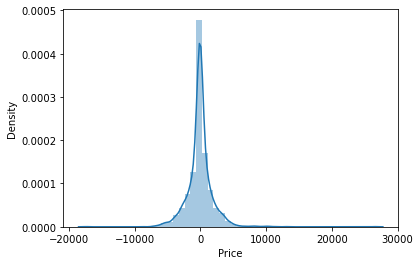

In [147]:
predict(RandomForestRegressor())

In [148]:
from sklearn.tree import DecisionTreeRegressor

Training score : 0.966591628243878
predections are : [16840.  6976.  8610. ...  3419.  5797.  6818.]


r2 score : 0.6925859639010153
MAE : 1375.7764258080622
MSE : 5984613.386309123
RMSE : 2446.3469472479005
MAPE : 15.187510937284868


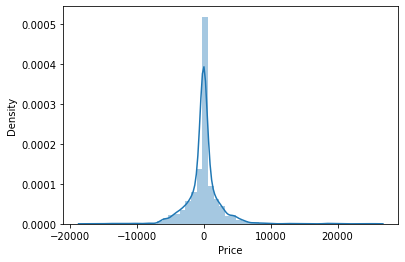

In [149]:
predict(DecisionTreeRegressor())

In [150]:
# How to hyper tune the machine learning model
from sklearn.model_selection import RandomizedSearchCV

In [151]:
reg_rf = RandomForestRegressor()

In [153]:
n_estimators = [int(x) for x in np.linspace(start=100,stop=1200,num=6)]

max_features = ['auto','sqrt']

max_depth = [int(x) for x in np.linspace(start=5,stop=30,num=4)]

min_samples_split = [5,10,15,100]

In [154]:
random_grid = {
    'n_estimators' : n_estimators,
    'max_features' : max_features,
    'max_depth'    : max_depth,
    'min_samples_split':min_samples_split
    
}

In [155]:
random_grid

{'n_estimators': [100, 320, 540, 760, 980, 1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 13, 21, 30],
 'min_samples_split': [5, 10, 15, 100]}

In [156]:
rf_random = RandomizedSearchCV(estimator=reg_rf, param_distributions=random_grid , cv=3, n_jobs=-1,verbose=2)

In [157]:
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [100, 320, 540, 760,
                                                         980, 1200]},
                   verbose=2)

In [158]:
rf_random.best_params_

{'n_estimators': 540,
 'min_samples_split': 5,
 'max_features': 'auto',
 'max_depth': 13}

In [159]:
rf_random.best_estimator_

RandomForestRegressor(max_depth=13, min_samples_split=5, n_estimators=540)

In [160]:
rf_random.best_score_

0.8218344493100526